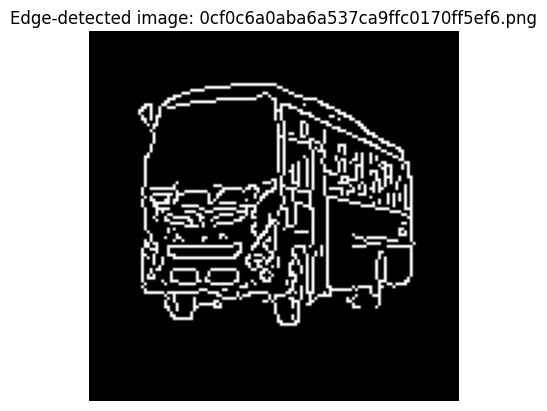

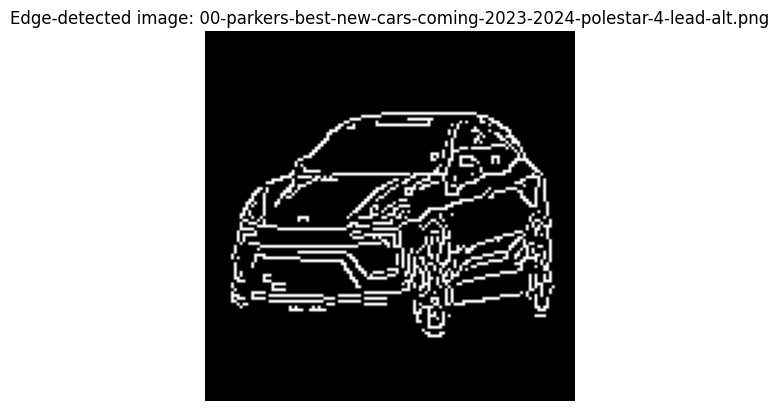

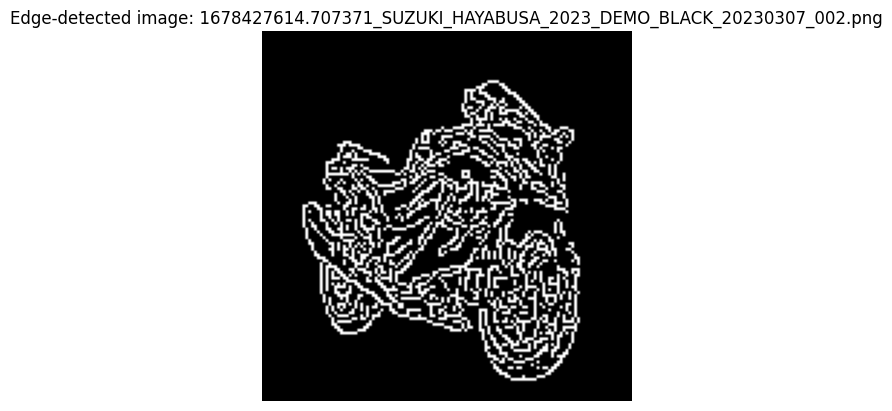

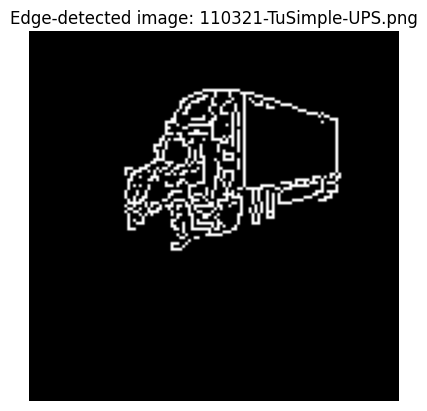

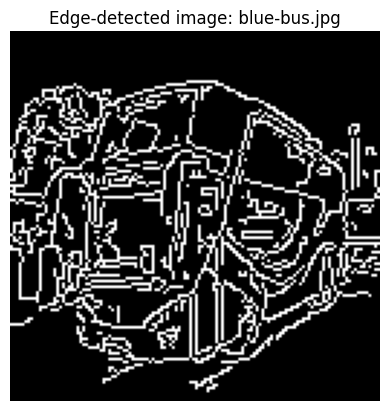

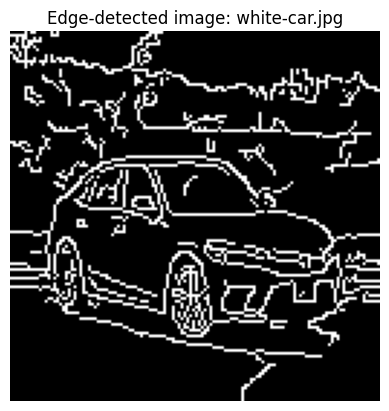

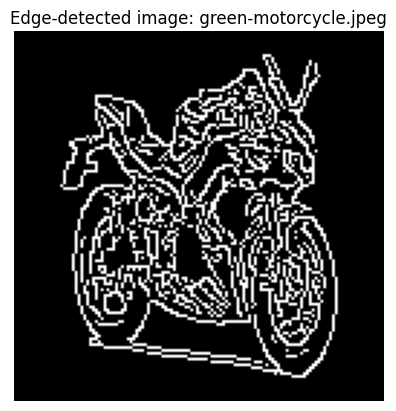

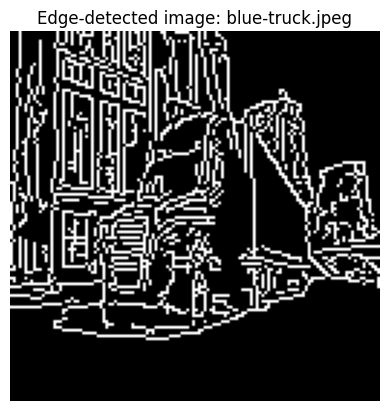

Classification Report:
              precision    recall  f1-score   support

         Bus       0.00      0.00      0.00         1
         Car       0.00      0.00      0.00         1
  Motorcycle       0.00      0.00      0.00         1
       Truck       0.25      1.00      0.40         1

    accuracy                           0.25         4
   macro avg       0.06      0.25      0.10         4
weighted avg       0.06      0.25      0.10         4



c:\Users\S W I F T  X\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\S W I F T  X\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\S W I F T  X\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

In [ ]:
import os
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define paths
dataset_path = "./dataset/train"
test_path = "./dataset/test"

def load_data(dataset_path):
    data = []
    labels = []

    for category in os.listdir(dataset_path):  # car, bus, truck
        category_path = os.path.join(dataset_path, category)
        if os.path.isdir(category_path):
            for img_name in os.listdir(category_path):
                img_path = os.path.join(category_path, img_name)
                # Read and preprocess the image
                img = cv2.imread(img_path)
                img = cv2.resize(img, (128, 128))  # Resize for uniformity
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                edges = cv2.Canny(gray, 100, 200)  # Apply Canny edge detection
                
                # plt.imshow(edges, cmap='gray')
                # plt.title(f"Edge-detected image: {img_name}")
                # plt.axis('off')
                # plt.show()

                # Flatten the edge-detected image as features
                data.append(edges.flatten())
                labels.append(category)
                break

    return np.array(data), np.array(labels)

# Load the dataset
X_train, y = load_data(dataset_path)
X_test, y_test = load_data(test_path)

# Encode labels (car -> 0, bus -> 1, truck -> 2)
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y)
y_test = label_encoder.fit_transform(y_test)

# Split dataset into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = svm_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Prediction function
def predict_image(image_path):
    img = cv2.imread(image_path)
    print(image_path)
    img = cv2.resize(img, (128, 128))  # Resize for uniformity
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)  # Apply Canny edge detection
    features = edges.flatten().reshape(1, -1)  # Reshape for prediction

    # Predict the class and confidence
    predicted_class_index = svm_model.predict(features)[0]
    confidence = np.max(svm_model.predict_proba(features))
    predicted_label = label_encoder.inverse_transform([predicted_class_index])[0]

    return predicted_label, confidence

In [15]:
# Test with a new image
test_image_path = "./dataset/test/Car/white-car.jpg"  # Replace with your test image path
predicted_label, confidence = predict_image(test_image_path)
print(f"The predicted label for the test image is: {predicted_label}")
print(f"Confidence level: {confidence:.2f}")

./dataset/test/Car/white-car.jpg
The predicted label for the test image is: Truck
Confidence level: 0.56
